In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Reduce_the_data_trend_temp_counts').getOrCreate()

df = spark.read.csv('../Bike-Sharing-Dataset-hour_new.csv',header=True,inferSchema=True)

In [8]:
import pandas as pd
from pyspark.sql.functions import *

group_df = df.select('temp','casual','registered','cnt')
group_df = group_df.groupBy('temp').mean()
group_df = group_df.select('temp',
                            format_number('avg(casual)',2),
                            format_number('avg(registered)',2),
                            format_number('avg(cnt)',2))
group_df = group_df.select(col('temp').alias('Temp'),
                           col('format_number(avg(casual), 2)').alias('Average Casual'),
                           col('format_number(avg(registered), 2)').alias('Average Registered'),
                           col('format_number(avg(cnt), 2)').alias('Average CNT')).orderBy('avg(cnt)')
pd.DataFrame(group_df.take(group_df.count()), columns=group_df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
Temp,0.08,0.04,0.02,0.06,0.1,0.14,0.12,0.18,0.16,0.22,...,0.74,0.78,0.92,0.86,0.84,0.82,0.76,0.8,0.88,0.98
Average Casual,1.94,1.75,0.94,2.75,1.67,2.43,2.22,3.31,3.49,4.51,...,74.41,76.13,76.45,80.58,83.46,88.28,82.51,85.29,97.96,82.00
Average Registered,26.29,33.88,40.94,39.25,47.63,52.67,56.20,56.81,62.09,65.41,...,238.75,237.07,243.57,242.37,242.36,251.41,260.06,262.08,265.70,457.00
Average CNT,28.24,35.62,41.88,42.00,49.29,55.11,58.42,60.12,65.58,69.91,...,313.15,313.20,320.02,322.95,325.82,339.69,342.58,347.38,363.66,539.00


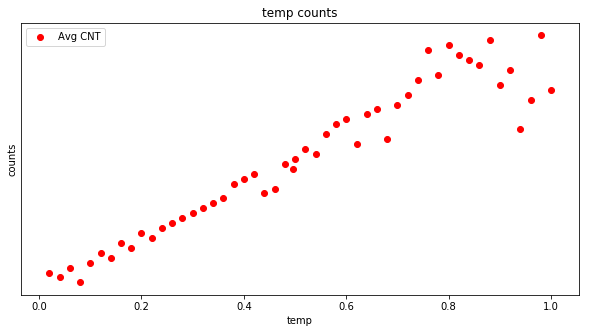

In [9]:
import matplotlib.pyplot as plt
import numpy as np

group_df = group_df.toPandas()

plt.scatter(group_df['Temp'], group_df['Average CNT'], color='r')
#plt.scatter(group_df['Temp'], group_df['Average Registered'], color='g')
#plt.scatter(group_df['Temp'], group_df['Average Casual'], color='b')

plt.yticks([]) #disable yticks
plt.legend(['Avg CNT'])
plt.xlabel('temp')
plt.ylabel('counts')
plt.title('temp counts')
plt.show()

In [7]:
plt.rcParams['figure.figsize'] = (10,5)